<a href="https://colab.research.google.com/github/lawielas/Hamoye-Data-Science-Internship/blob/master/hamoye2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>HDSC week two quiz code</h1></b>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset from github
url='https://raw.githubusercontent.com/lawielas/Hamoye-Data-Science-Internship/Data/energydata_complete.csv'

In [3]:
energy_data= pd.read_csv(url, error_bad_lines=False)

In [4]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#renaming the columns
column_names={'date':'timestamp', 'Appliances':'appliances_energy', 'lights':'lights_energy', 'T1':'temperature_kitchen',
              'RH_1':'humidity_kitchen', 'T2':'temperature_livingroom', 'RH_2':'humidity_livingroom', 'T3':'temperature_lundary', 'RH_3':'humidity_lundary', 'T4':'temperature_office',
              'RH_4':'humidity_office', 'T5':'temperature_bathroom', 'RH_5':'humidity_bathroom', 'T6':'temperature_north', 'RH_6':'humidity_north', 'T7':'temperature_ironingroom', 
              'RH_7':'humidity_ironingroom', 'T8':'temperature_teenager', 'RH_8':'humidity_teenager', 'T9':'temperature_parent', 'RH_9':'humidity_parent', 'T_out':'temperature_out', 
              'Press_mm_hg':'pressure_mm_hg', 'RH_out':'humidity_outside', 'Windspeed':'windspeed', 
              'Visibility':'visibility', 'Tdewpoint':'tdewpoint', 'rv1':'random_variable_1', 'rv2':'random_variable_2'}

In [6]:
energy_data=energy_data.rename(columns=column_names)

In [7]:
energy_data.head()

,timestamp,appliances_energy,lights_energy,temperature_kitchen,humidity_kitchen,temperature_livingroom,humidity_livingroom,temperature_lundary,humidity_lundary,temperature_office,humidity_office,temperature_bathroom,humidity_bathroom,temperature_north,humidity_north,temperature_ironingroom,humidity_ironingroom,temperature_teenager,humidity_teenager,temperature_parent,humidity_parent,temperature_out,pressure_mm_hg,humidity_outside,windspeed,visibility,tdewpoint,random_variable_1,random_variable_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
energy_data.describe(include='all')

,timestamp,appliances_energy,lights_energy,temperature_kitchen,humidity_kitchen,temperature_livingroom,humidity_livingroom,temperature_lundary,humidity_lundary,temperature_office,humidity_office,temperature_bathroom,humidity_bathroom,temperature_north,humidity_north,temperature_ironingroom,humidity_ironingroom,temperature_teenager,humidity_teenager,temperature_parent,humidity_parent,temperature_out,pressure_mm_hg,humidity_outside,windspeed,visibility,tdewpoint,random_variable_1,random_variable_2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-12 08:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [9]:
simple_linear_reg_energy_data=energy_data[['temperature_kitchen', 'appliances_energy']].sample(15, random_state=2)

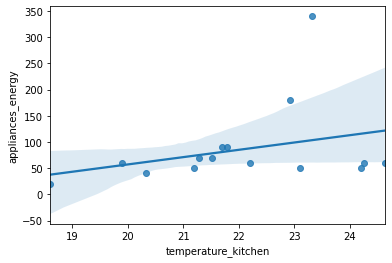

In [10]:
sns.regplot(x="temperature_kitchen", y="appliances_energy", data=simple_linear_reg_energy_data)

<h1>The Models</h1>

In [11]:
#removing the timestamp(date) and lights_energy(ligths)
energy_data.drop(columns=[ 'timestamp' , 'lights_energy' ], inplace = True)

In [12]:
energy_data.head()

,appliances_energy,temperature_kitchen,humidity_kitchen,temperature_livingroom,humidity_livingroom,temperature_lundary,humidity_lundary,temperature_office,humidity_office,temperature_bathroom,humidity_bathroom,temperature_north,humidity_north,temperature_ironingroom,humidity_ironingroom,temperature_teenager,humidity_teenager,temperature_parent,humidity_parent,temperature_out,pressure_mm_hg,humidity_outside,windspeed,visibility,tdewpoint,random_variable_1,random_variable_2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [13]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_energy_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)

In [14]:
features_energy_data = normalised_energy_data.drop(columns=['appliances_energy'])
energy_target = normalised_energy_data[ 'appliances_energy' ]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_energy_data, energy_target,
test_size= 0.3 , random_state= 42 )

In [16]:
print(f'shape of training set is {x_train.shape}')
print(f'shape of testing set is {x_test.shape}')

shape of training set is (13814, 26)
shape of testing set is (5921, 26)


<h2>Multiple Linear Regression</h2>

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [19]:
#calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2 )

0.05

In [20]:
#calculating the Residual sum of square
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2 )

45.35

In [21]:
#calculating the root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.088

In [22]:
#calculating the coefficient of determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2 )

0.15

<h2>Ridge Model</h2>

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5 )
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

<h2>Lasso Model</h2>

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)

predicted_values1 = lasso_reg.predict(x_test)

In [26]:
#calculating the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values1))
round(rmse, 3 )

0.094

In [28]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight' )
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features' )
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features' )

In [29]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,humidity_livingroom,-0.456698,-0.401134,-0.000000
1,temperature_out,-0.321860,-0.250765,0.000000
2,temperature_livingroom,-0.236178,-0.193880,0.000000
3,temperature_parent,-0.189941,-0.188584,-0.000000
4,humidity_teenager,-0.157595,-0.156596,-0.000110
5,humidity_outside,-0.077671,-0.050541,-0.049557
6,humidity_ironingroom,-0.044614,-0.046291,-0.000000
7,humidity_parent,-0.039800,-0.041701,-0.000000
8,temperature_bathroom,-0.015657,-0.020727,-0.000000
9,temperature_kitchen,-0.003281,-0.021549,0.000000


**Question 12**

In [30]:
target_column=['temperature_north']
predictor=['temperature_livingroom']
energy_data[predictor]=energy_data[predictor]/energy_data[predictor].max()
energy_data.describe

<bound method NDFrame.describe of        appliances_energy  ...  random_variable_2
0                     60  ...          13.275433
1                     60  ...          18.606195
2                     50  ...          28.642668
3                     50  ...          45.410389
4                     60  ...          10.084097
...                  ...  ...                ...
19730                100  ...          43.096812
19731                 90  ...          49.282940
19732                270  ...          29.199117
19733                420  ...           6.322784
19734                430  ...          34.118851

[19735 rows x 27 columns]>

In [31]:
X=energy_data[predictor].values
Y=energy_data[target_column].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print(X_train.shape); print(X_test.shape)

(13814, 1)
(5921, 1)


In [32]:
lr2=LinearRegression()
lr2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred_train_lr2 = lr2.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train, pred_train_lr2)))

pred_test_lr2 = lr2.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, pred_test_lr2)))


3.65053668239136
3.630315129680444


In [35]:
from sklearn.metrics import r2_score
r2_score = r2_score(Y_test, pred_test_lr2)
round(r2_score, 2 )

0.64